### Portfolio Analysis  (Including Cryptocurrency, Metals & Stocks)

Portfolio Analysis is the process of reviewing or assessing the elements of the entire portfolio of securities or products in a business. The analysis also helps in proper resource/asset allocation to different elements in the portfolio.

##### This notebook:

Runs an example Monte Carlo Simulation for an optimal portfolio with resulting returns


In [47]:
import pandas as pd
import yfinance as yf
from pathlib import Path
import numpy as np
import datetime
import matplotlib.pyplot as plt
import hvplot.pandas 
from matplotlib import style
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [49]:
tickers = ['BTC-USD', 'ETH-USD', 'BCH-USD','GC=F', 'SI=F', '^GSPC']

data = yf.download(tickers, '2019-04-01')['Adj Close']

data.columns = ['Bitcoin_Cash','Bitcoin', 'Etherum', 'Gold', 'Silver', 'SP500' ]
data.fillna(method='ffill', inplace=True)

data.tail()

[*********************100%***********************]  6 of 6 completed


Bitcoin_Cash      Bitcoin     Etherum         Gold  Silver  \
Date                                                                     
2020-05-04    245.469772  8912.654297  208.174011  1700.900024  14.938   
2020-05-05    244.592316  9003.070312  206.774399  1712.099976  15.100   
2020-05-06    245.816116  9268.761719  204.055786  1691.900024  15.005   
2020-05-07    245.816116  9268.761719  204.055786  1723.199951  15.570   
2020-05-08    253.862961  9955.063477  213.620468  1723.199951  15.570   

                  SP500  
Date                     
2020-05-04  2842.739990  
2020-05-05  2868.439941  
2020-05-06  2848.419922  
2020-05-07  2881.189941  
2020-05-08  2881.189941

In [50]:
news_data = Path("./Resources/project1_1_events.csv")
news_data= pd.read_csv(news_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
news_data["Flag"] = 1
news_data.head()

Event  \
Date                                                            
2019-05-08  Hackers Steal $40 Million Worth of Bitcoin Fro...   
2019-05-24                    Theresa May Resigns as PM of GB   
2019-05-01   Trump First Tweets About $200 Billion in Chin...   
2019-06-30               2019 Koreas–United States DMZ summit   
2019-06-16  U.S. blames Iran for helping Houthi rebels sho...   

                                                       Source    Topic  Flag  
Date                                                                          
2019-05-08  https://www.bloomberg.com/news/articles/2019-0...   Crypto     1  
2019-05-24      https://www.bbc.com/news/uk-politics-48379730  General     1  
2019-05-01  https://twitter.com/realDonaldTrump/status/112...  General     1  
2019-06-30  https://www.nytimes.com/2019/06/30/world/asia/...  General     1  
2019-06-16  https://www.reuters.com/article/us-mideast-att...  General     1

In [51]:
combined_df = data.merge(news_data, on='Date', how='left')
combined_df.loc['2019-05-01']

Bitcoin_Cash                                              271.816
Bitcoin                                                    5402.7
Etherum                                                   160.818
Gold                                                       1281.4
Silver                                                     14.645
SP500                                                     2923.73
Event            Trump First Tweets About $200 Billion in Chin...
Source          https://twitter.com/realDonaldTrump/status/112...
Topic                                                     General
Flag                                                            1
Name: 2019-05-01 00:00:00, dtype: object

In [52]:
#combined_df['Flag'] = np.where(combined_df['Event'] == "NaN", 0, np.where(combined_df['Event'] != "NaN", 1, np.NaN))
combined_df["Flag"] = combined_df["Flag"].replace(np.NaN, 0)
combined_df

Bitcoin_Cash      Bitcoin     Etherum         Gold  Silver  \
Date                                                                     
2019-04-01    167.626999  4158.183105  141.830322  1288.400024  15.051   
2019-04-02    236.132599  4879.877930  163.961746  1290.000000  15.018   
2019-04-03    298.352539  4973.021973  161.458801  1289.900024  15.059   
2019-04-04    286.567657  4922.798828  158.052536  1289.000000  15.041   
2019-04-05    292.641144  5036.681152  165.514847  1290.400024  15.043   
...                  ...          ...         ...          ...     ...   
2020-05-04    245.469772  8912.654297  208.174011  1700.900024  14.938   
2020-05-05    244.592316  9003.070312  206.774399  1712.099976  15.100   
2020-05-06    245.816116  9268.761719  204.055786  1691.900024  15.005   
2020-05-07    245.816116  9268.761719  204.055786  1723.199951  15.570   
2020-05-08    253.862961  9955.063477  213.620468  1723.199951  15.570   

                  SP500 Event Source Topic  Flag  
Date                                              
2019-04-01  2867.189941   NaN    NaN   NaN   0.0  
2019-04-02  2867.239990   NaN    NaN   NaN   0.0  
2019-04-03  2873.399902   NaN    NaN   NaN   0.0  
2019-04-04  2879.389893   NaN    NaN   NaN   0.0  
2019-04-05  2892.739990   NaN    NaN   NaN   0.0  
...                 ...   ...    ...   ...   ...  
2020-05-04  2842.739990   NaN    NaN   NaN   0.0  
2020-05-05  2868.439941   NaN    NaN   NaN   0.0  
2020-05-06  2848.419922   NaN    NaN   NaN   0.0  
2020-05-07  2881.189941   NaN    NaN   NaN   0.0  
2020-05-08  2881.189941   NaN    NaN   NaN   0.0  

[409 rows x 10 columns]

In [53]:
combined_df = combined_df.fillna('')
combined_df

Bitcoin_Cash      Bitcoin     Etherum         Gold  Silver  \
Date                                                                     
2019-04-01    167.626999  4158.183105  141.830322  1288.400024  15.051   
2019-04-02    236.132599  4879.877930  163.961746  1290.000000  15.018   
2019-04-03    298.352539  4973.021973  161.458801  1289.900024  15.059   
2019-04-04    286.567657  4922.798828  158.052536  1289.000000  15.041   
2019-04-05    292.641144  5036.681152  165.514847  1290.400024  15.043   
...                  ...          ...         ...          ...     ...   
2020-05-04    245.469772  8912.654297  208.174011  1700.900024  14.938   
2020-05-05    244.592316  9003.070312  206.774399  1712.099976  15.100   
2020-05-06    245.816116  9268.761719  204.055786  1691.900024  15.005   
2020-05-07    245.816116  9268.761719  204.055786  1723.199951  15.570   
2020-05-08    253.862961  9955.063477  213.620468  1723.199951  15.570   

                  SP500 Event Source Topic  Flag  
Date                                              
2019-04-01  2867.189941                      0.0  
2019-04-02  2867.239990                      0.0  
2019-04-03  2873.399902                      0.0  
2019-04-04  2879.389893                      0.0  
2019-04-05  2892.739990                      0.0  
...                 ...   ...    ...   ...   ...  
2020-05-04  2842.739990                      0.0  
2020-05-05  2868.439941                      0.0  
2020-05-06  2848.419922                      0.0  
2020-05-07  2881.189941                      0.0  
2020-05-08  2881.189941                      0.0  

[409 rows x 10 columns]

In [54]:
import plotly.graph_objects as go
# Initialize figure
fig = go.Figure()
# Add Traces
fig.add_trace(
    go.Scatter(x=list(combined_df.index),
               y=list(combined_df.Bitcoin_Cash),
               name="Bitcoin_Cash",
               line=dict(color="firebrick")))
fig.add_trace(
    go.Scatter(x=list(combined_df.index),
               y=list(combined_df.Bitcoin),
               name="Bitcoin",
               line=dict(color="royalblue")))
fig.add_trace(
    go.Scatter(x=list(combined_df.index),
               y=list(combined_df.Etherum),
               name="Etherum",
               line=dict(color="#33CFC5")))
fig.add_trace(
    go.Scatter(x=list(combined_df.index),
               y=list(combined_df.Gold),
               name="Gold",
               line=dict(color="#636363")))
fig.add_trace(
    go.Scatter(x=list(combined_df.index),
               y=list(combined_df.Silver),
               name="Silver",
               line=dict(color="LightSeaGreen")))
fig.add_trace(
    go.Scatter(x=list(combined_df.index),
               y=list(combined_df.SP500),
               name="SP500",
               line=dict(color="#ff7f0e")))


fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All Stocks",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True]}]),
                dict(label="Bitcoin_Cash",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False]}]),
                dict(label="Bitcoin",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False]}]),
                dict(label="Etherum",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False]}]),
                dict(label="Gold",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False]}]),
                dict(label="Silver",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False]}]),
                dict(label="SP500",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True]}])
            ]),
        )
    ])
# Set title
fig.update_layout(title_text="Portfolio")
fig.show()

In [55]:
one = combined_df[combined_df.Flag==1].hvplot.scatter(x="Date", y="Bitcoin")
two = combined_df.hvplot.scatter(x="Date", y="Bitcoin")
two*one

:Overlay
   .Scatter.I  :Scatter   [Date]   (Bitcoin)
   .Scatter.II :Scatter   [Date]   (Bitcoin)

#### Performance 

Calculate Daily Returns & Cumulative Returns

In [56]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = data.pct_change()
daily_returns.tail()

Bitcoin_Cash   Bitcoin   Etherum      Gold    Silver     SP500
Date                                                                      
2020-05-04     -0.028014  0.001707 -0.013081 -0.003223 -0.001804  0.004250
2020-05-05     -0.003575  0.010145 -0.006723  0.006585  0.010845  0.009041
2020-05-06      0.005003  0.029511 -0.013148 -0.011798 -0.006291 -0.006979
2020-05-07      0.000000  0.000000  0.000000  0.018500  0.037654  0.011505
2020-05-08      0.032735  0.074045  0.046873  0.000000  0.000000  0.000000

In [57]:
#Describe daily returns
daily_returns.describe().transpose()

count      mean       std       min       25%       50%  \
Bitcoin_Cash  403.0  0.002941  0.061649 -0.429560 -0.022375 -0.001103   
Bitcoin       403.0  0.003140  0.043097 -0.371695 -0.015550  0.001073   
Etherum       403.0  0.002332  0.049664 -0.423472 -0.018579  0.000247   
Gold          403.0  0.000773  0.010216 -0.047732 -0.001522  0.000000   
Silver        403.0  0.000230  0.017023 -0.122183 -0.003054  0.000000   
SP500         403.0  0.000144  0.016192 -0.119841 -0.001593  0.000000   

                   75%       max  
Bitcoin_Cash  0.023174  0.408679  
Bitcoin       0.020772  0.181878  
Etherum       0.022379  0.189404  
Gold          0.003233  0.076411  
Silver        0.004926  0.110799  
SP500         0.003506  0.093828

In [58]:
columns=['Bitcoin_Cash', 'Bitcoin', 'Etherum', 'Gold', 'Silver', 'SP500']
daily_returns.hvplot.box(y=columns, group_label='Ticker', legend=False, value_label='Daily Returns', invert=True)

:BoxWhisker   [Ticker]   (Daily Returns)

In [59]:
# Cumulative Returns
cum_returns = ((data.pct_change()+1).cumprod())
cum_returns.hvplot.table(width=600, backlog=10)





:Table   [Date,Bitcoin_Cash,Bitcoin,Etherum,Gold,Silver,SP500]

In [60]:
# Visualize Cumulative Returns
cum_returns.hvplot.line().opts(legend_position = 'bottom')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [61]:
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
portfolio_std = daily_returns.std()
portfolio_std

Bitcoin_Cash    0.061649
Bitcoin         0.043097
Etherum         0.049664
Gold            0.010216
Silver          0.017023
SP500           0.016192
dtype: float64

In [62]:
# Determine which portfolios are riskier than the S&P 500
portfolio_std[(portfolio_std['SP500'] < portfolio_std)]

Bitcoin_Cash    0.061649
Bitcoin         0.043097
Etherum         0.049664
Silver          0.017023
dtype: float64

#### Correlation, Beta & Sharpe Ratio

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

* Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
* Calculate Beta, Sharpe Ratio 

In [63]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

Bitcoin_Cash   Bitcoin   Etherum      Gold    Silver     SP500
Bitcoin_Cash      1.000000  0.816376  0.825175  0.005555 -0.034726  0.232017
Bitcoin           0.816376  1.000000  0.864965  0.057750  0.001128  0.264866
Etherum           0.825175  0.864965  1.000000  0.042438 -0.023864  0.328356
Gold              0.005555  0.057750  0.042438  1.000000  0.737818  0.010024
Silver           -0.034726  0.001128 -0.023864  0.737818  1.000000 -0.054345
SP500             0.232017  0.264866  0.328356  0.010024 -0.054345  1.000000

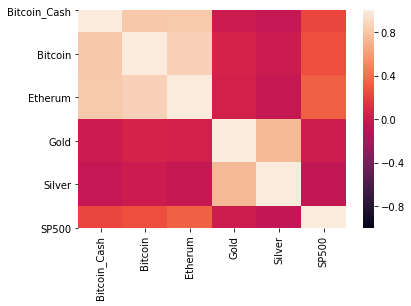

In [64]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

Evaluate Riskiness

In [65]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

Gold            0.162167
SP500           0.257040
Silver          0.270227
Bitcoin         0.684146
Etherum         0.788392
Bitcoin_Cash    0.978642
dtype: float64

In [66]:
# Calculate Beta for the portfolio compared to the total market (S&P 500)
for item in data:
    covariance = daily_returns[item].cov(daily_returns['SP500'])
    variance = daily_returns['SP500'].var()
    beta = round(covariance / variance, 2)
    print(item, ":", beta)
   

Bitcoin_Cash : 0.88
Bitcoin : 0.7
Etherum : 1.01
Gold : 0.01
Silver : -0.06
SP500 : 1.0


### Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [67]:
# Annualzied Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios

Bitcoin_Cash    0.757293
Bitcoin         1.156741
Etherum         0.745296
Gold            1.201904
Silver          0.214768
SP500           0.141200
dtype: float64

In [68]:
sharpe_ratios.hvplot.bar(figsize=[15,10], title="Sharpe Ratios")

:Bars   [index]   (0)

In [69]:
cov_matrix_annual = daily_returns.cov() * 252
cov_matrix_annual

Bitcoin_Cash   Bitcoin   Etherum      Gold    Silver     SP500
Bitcoin_Cash      0.957739  0.546591  0.636667  0.000882 -0.009183  0.058364
Bitcoin           0.546591  0.468055  0.466541  0.006407  0.000208  0.046577
Etherum           0.636667  0.466541  0.621562  0.005426 -0.005084  0.066541
Gold              0.000882  0.006407  0.005426  0.026298  0.032333  0.000418
Silver           -0.009183  0.000208 -0.005084  0.032333  0.073022 -0.003775
SP500             0.058364  0.046577  0.066541  0.000418 -0.003775  0.066069

In [70]:
#Expected portfolio variance= WT * (Covariance Matrix) * W
weights = np.array([0.1, 0.2, 0.1, 0.2, 0.1, 0.3])
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.11019060423464865

In [71]:
# Expected Portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.3319497013624935

In [72]:
# Expected Annual Return
portfolioSimpleAnnualReturn = np.sum(daily_returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.34681994527203314

In [73]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'

print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 35.0%
Annual volatility/standard deviation/risk : 33.0%
Annual variance : 11.0%


### Portfolio Optimization: Monte Carlo Simulation

Portfolio Optimization is used for risk-averse investors to construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward

Single Random Simulation

* Set our weights to a random numpy array
* Rebalance the weights so they add up to one
* Calculate the expected portfolio return
* Calculate the expected portfolio volatility
* Calculate the Sharpe Ratio

In [74]:
print(data.columns)

weights = np.array(np.random.random(6))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((daily_returns.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(daily_returns.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['Bitcoin_Cash', 'Bitcoin', 'Etherum', 'Gold', 'Silver', 'SP500'], dtype='object')
Random Weights:
[0.79773384 0.0284572  0.5660092  0.28984742 0.67256543 0.31609859]
Rebalance
[0.2986971  0.01065529 0.21193198 0.10852816 0.25183004 0.11835744]
Expected Portfolio Return
0.39439457260957284
Expected Volatility
0.4615333446417172
Sharpe Ratio
0.8545310478395372


Multiple Random Simulation

In [75]:
num_ports = 5000
all_weights = np.zeros((num_ports, len(data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(6)) 
    weights = weights/np.sum(weights)  
    	
    # save the weights
    all_weights[ind,:] = weights
	    
    # expected return 
    ret_arr[ind] = np.sum((daily_returns.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(daily_returns.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [76]:
# Maximum Sharpe Ratio
sharpe_arr.max()

1.3306461539196437

In [77]:
# Get the location of the maximum Sharpe Ratio & allocation for that index
sharpe_arr.argmax()


3068

In [78]:
all_weights[1765,:]

array([0.19536652, 0.15077511, 0.21786462, 0.15325447, 0.24569977,
       0.03703951])

Text(0, 0.5, 'Return')

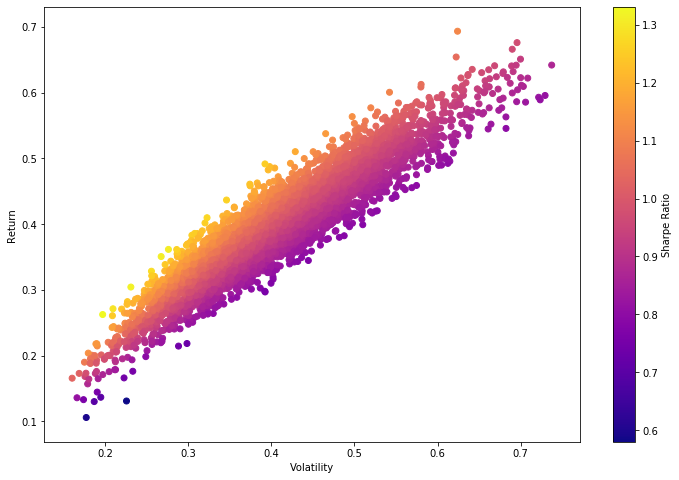

In [79]:
# Plot the data
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

Highlight the location of the maximum Sharpe Ratio.

In [80]:
max_sr_ret = ret_arr[1765]
max_sr_vol = vol_arr[1765]

In [81]:
import holoviews as hv
scatter = hv.Scatter((vol_arr, ret_arr, sharpe_arr), 'Volatility', ['Return', 'Sharpe Ratio'])
max_sharpe = hv.Scatter([(max_sr_vol,max_sr_ret)])

scatter.opts(color='Sharpe Ratio', cmap='plasma', width=600, height=400, colorbar=True, padding=0.1) *\
max_sharpe.opts(color='red', line_color='black', size=10)

:Overlay
   .Scatter.I  :Scatter   [Volatility]   (Return,Sharpe Ratio)
   .Scatter.II :Scatter   [x]   (y)

In [ ]:
#Candlestick graphs
#BTC data
stock = 'BTC-USD'
df = web.DataReader(stock, data_source='yahoo', start='05-08-2019')
df = df[['Open', 'High', 'Low', 'Close']]
df.fillna(method='ffill', inplace=True)
df.reset_index(inplace=True)
df['Date'] = df['Date'].map(mdates.date2num)

#Bitcoin Cash data
stock_1 = 'BCH-USD'
df_1 = web.DataReader(stock_1, data_source='yahoo', start='05-08-2019')
df_1= df_1[['Open', 'High', 'Low', 'Close']]
df_1.fillna(method='ffill', inplace=True)
df_1.reset_index(inplace=True)
df_1['Date'] = df_1['Date'].map(mdates.date2num)

#ETH data
stock_2 = 'ETH-USD'
df_2 = web.DataReader(stock_2, data_source='yahoo', start='05-08-2019')
df_2= df_2[['Open', 'High', 'Low', 'Close']]
df_2.fillna(method='ffill', inplace=True)
df_2.reset_index(inplace=True)
df_2['Date'] = df_2['Date'].map(mdates.date2num)

#S&P500 data
stock_3 = '^GSPC'
df_3 = web.DataReader(stock_3, data_source='yahoo', start='05-08-2019')
df_3= df_3[['Open', 'High', 'Low', 'Close']]
df_3.fillna(method='ffill', inplace=True)
df_3.reset_index(inplace=True)
df_3['Date'] = df_3['Date'].map(mdates.date2num)

#Gold data
stock_4 = 'GC=F'
df_4 = web.DataReader(stock_4, data_source='yahoo', start='05-08-2019')
df_4= df_4[['Open', 'High', 'Low', 'Close']]
df_4.fillna(method='ffill', inplace=True)
df_4.reset_index(inplace=True)
df_4['Date'] = df_4['Date'].map(mdates.date2num)

# Bitcoin Cash
stock_5 = 'SI=F'
df_5 = web.DataReader(stock_4, data_source='yahoo', start='05-08-2019')
df_5= df_5[['Open', 'High', 'Low', 'Close']]
df_5.fillna(method='ffill', inplace=True)
df_5.reset_index(inplace=True)
df_5['Date'] = df_5['Date'].map(mdates.date2num)

In [ ]:
ax = plt.subplot()
candlestick_ohlc(ax, df.values, width=5, colorup='g', colordown='r')
ax.xaxis_date()
ax.grid(True)
plt.title('BTC Stock Prices Over the Past Year')
plt.show()

ax_1 = plt.subplot()
candlestick_ohlc(ax_1, df_1.values, width=5, colorup='g', colordown='r')
ax_1.xaxis_date()
ax_1.grid(True)
plt.title('Bitcoin Cash Stock Prices Over the Past Year')
plt.show()

ax_2 = plt.subplot()
candlestick_ohlc(ax_2, df_2.values, width=5, colorup='g', colordown='r')
ax_2.xaxis_date()
ax_2.grid(True)
plt.title('ETH Stock Prices Over the Past Year')
plt.show()

ax_3 = plt.subplot()
candlestick_ohlc(ax_3, df_3.values, width=5, colorup='g', colordown='r')
ax_3.xaxis_date()
ax_3.grid(True)
plt.title('S&P500 Stock Prices Over the Past Year')
plt.show()

ax_4 = plt.subplot()
candlestick_ohlc(ax_4, df_4.values, width=5, colorup='g', colordown='r')
ax_4.xaxis_date()
ax_4.grid(True)
plt.title('Gold Stock Prices Over the Past Year')
plt.show()

ax_5 = plt.subplot()
candlestick_ohlc(ax_5, df_5.values, width=5, colorup='g', colordown='r')
ax_5.xaxis_date()
ax_5.grid(True)
plt.title('Silver Stock Prices Over the Past Year')
plt.show()

# Dashboard

---

In [124]:
# Define Panel Visualization Functions
import panel as pn
from panel.interact import interact
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt
pn.extension('plotly')

def portfolio():
    
    fig = go.Figure()
# Add Traces
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Bitcoin_Cash),
                   name="Bitcoin_Cash",
                   line=dict(color="firebrick")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Bitcoin),
                   name="Bitcoin",
                   line=dict(color="royalblue")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Etherum),
                   name="Etherum",
                   line=dict(color="#33CFC5")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Gold),
                   name="Gold",
                   line=dict(color="#636363")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.Silver),
                   name="Silver",
                   line=dict(color="LightSeaGreen")))
    fig.add_trace(
        go.Scatter(x=list(combined_df.index),
                   y=list(combined_df.SP500),
                   name="SP500",
                   line=dict(color="#ff7f0e")))


    fig.update_layout(
        updatemenus=[
            dict(
                active=0,
                buttons=list([
                    dict(label="All Stocks",
                         method="update",
                         args=[{"visible": [True, True, True, True, True, True]}]),
                    dict(label="Bitcoin_Cash",
                         method="update",
                         args=[{"visible": [True, False, False, False, False, False]}]),
                    dict(label="Bitcoin",
                         method="update",
                         args=[{"visible": [False, True, False, False, False, False]}]),
                    dict(label="Etherum",
                         method="update",
                         args=[{"visible": [False, False, True, False, False, False]}]),
                    dict(label="Gold",
                         method="update",
                         args=[{"visible": [False, False, False, True, False, False]}]),
                    dict(label="Silver",
                         method="update",
                         args=[{"visible": [False, False, False, False, True, False]}]),
                    dict(label="SP500",
                         method="update",
                         args=[{"visible": [False, False, False, False, False, True]}])
                ]),
            )
        ])
    # Set title
    fig.update_layout(title_text="Portfolio")
    fig.show()
    return fig 

# Daily returns
def daily_returns():
    daily_returns = data.pct_change()
    columns=['Bitcoin_Cash', 'Bitcoin', 'Etherum', 'Gold', 'Silver', 'SP500']
    new_daily_returns = daily_returns.hvplot.box(y=columns, group_label='Ticker', legend=False, value_label='Daily Returns', invert=True)
    
    return new_daily_returns

# Cumulative returns
def cumulative_returns():
    cum_returns = ((data.pct_change()+1).cumprod())
    cum_returns.hvplot.table(width=600, backlog=10)
    new_cum_returns = cum_returns.hvplot.line().opts(legend_position = 'bottom')
    
    return new_cum_returns

# Correlation
def correlation():
    daily_returns = data.pct_change()
    correlation = daily_returns.corr()
    new_graph = sns.heatmap(correlation, vmin=-1, vmax=1)
    
    return new_graph

# Sharpe ratios
def sharpe_ratios():
    daily_returns = data.pct_change()
    sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
    new_sharpe = sharpe_ratios.hvplot.bar(figsize=[15,10], title="Sharpe Ratios")
    
    return new_sharpe

# Volatility
def volatility():
    daily_returns = data.pct_change()
    
    num_ports = 5000
    all_weights = np.zeros((num_ports, len(data.columns)))
    ret_arr = np.zeros(num_ports)
    vol_arr = np.zeros(num_ports)
    sharpe_arr = np.zeros(num_ports)

    for ind in range(num_ports): 
        # weights 
        weights = np.array(np.random.random(6)) 
        weights = weights/np.sum(weights)  
            
        # save the weights
        all_weights[ind,:] = weights
            
        # expected return 
        ret_arr[ind] = np.sum((daily_returns.mean()*weights)*252)

        # expected volatility 
        vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(daily_returns.cov()*252, weights)))
        
    all_weights[1765,:]
    
    plt.figure(figsize=(12,8))
    plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    
    return plt

def max_volatility():
    scatter = hv.Scatter((vol_arr, ret_arr, sharpe_arr), 'Volatility', ['Return', 'Sharpe Ratio'])
    max_sharpe = hv.Scatter([(max_sr_vol,max_sr_ret)])

    scatter.opts(color='Sharpe Ratio', cmap='plasma', width=600, height=400, colorbar=True, padding=0.1) *\
    max_sharpe.opts(color='red', line_color='black', size=10)
    
    return max_sharpe



Column
    [0] Markdown(str)
    [1] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive11578')
    [2] Column
        [0] Column()
        [1] Row
            [0] HoloViews(BoxWhisker, name='interactive11584')
    [3] Column
        [0] Column()
        [1] Row
            [0] HoloViews(NdOverlay, name='interactive11617')
    [4] Column
        [0] Column()
        [1] Row
            [0] Str(module, name='interactive11748')

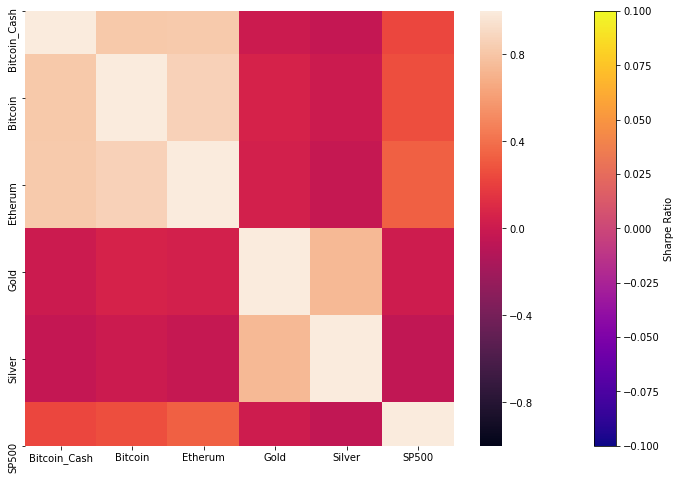

In [125]:
title = "#Stock Analysis"
tab_1 = pn.Column(
    '##graph',
    portfolio,
    daily_returns,
    cumulative_returns,
    volatility)

tab_2 = pn.Column(
    '##Other graphs',
    correlation,
    sharpe_ratios,
    max_volatility)

tab_1

In [126]:
panel = pn.Tabs(
    ("Graph", tab_1),
    ("Graphs", tab_2))

In [127]:
panel.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive11578', viewport={'xaxis.range': [155407680...})
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(BoxWhisker, name='interactive11584')
        [3] Column
            [0] Column()
            [1] Row
                [0] HoloViews(NdOverlay, name='interactive11617')
        [4] Column
            [0] Column()
            [1] Row
                [0] Str(module, name='interactive11748')
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive11757')
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive11763')
        [3] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Scatter, name='interactive11799')